In [106]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# 2. Load dataset
df = pd.read_csv(r"C:\Users\mungi\Downloads\imdb_top_1000.csv")
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [110]:
# 3. Select relevant columns
cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Genre', 'Gross']
df = df[cols]
df

,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Genre,Gross
0,9.3,80.0,2343110,142 min,Drama,"28,341,469"
1,9.2,100.0,1620367,175 min,"Crime, Drama","134,966,411"
2,9.0,84.0,2303232,152 min,"Action, Crime, Drama","534,858,444"
3,9.0,90.0,1129952,202 min,"Crime, Drama","57,300,000"
4,9.0,96.0,689845,96 min,"Crime, Drama","4,360,000"
...,...,...,...,...,...,...
995,7.6,76.0,166544,115 min,"Comedy, Drama, Romance",NaN
996,7.6,84.0,34075,201 min,"Drama, Western",NaN
997,7.6,85.0,43374,118 min,"Drama, Romance, War","30,500,000"
998,7.6,78.0,26471,97 min,"Drama, War",NaN


In [112]:
# 4. Clean Runtime (remove 'min')
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64

In [114]:
# 5. Clean Gross (remove commas, convert to float)
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['Gross'] 

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            NaN
996            NaN
997     30500000.0
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: float64

In [116]:
# 6. Drop missing values (this time correctly!)
df = df.dropna()
df

,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Genre,Gross
0,9.3,80.0,2343110,142,Drama,28341469.0
1,9.2,100.0,1620367,175,"Crime, Drama",134966411.0
2,9.0,84.0,2303232,152,"Action, Crime, Drama",534858444.0
3,9.0,90.0,1129952,202,"Crime, Drama",57300000.0
4,9.0,96.0,689845,96,"Crime, Drama",4360000.0
...,...,...,...,...,...,...
990,7.6,77.0,30144,157,"Drama, War, Western",696690.0
991,7.6,50.0,45338,144,"Adventure, Comedy, War",1378435.0
992,7.6,65.0,166409,78,"Animation, Adventure, Family",141843612.0
994,7.6,96.0,40351,87,"Comedy, Music, Musical",13780024.0


In [118]:
df.isnull().sum()

IMDB_Rating    0
Meta_score     0
No_of_Votes    0
Runtime        0
Genre          0
Gross          0
dtype: int64

In [120]:
df.columns

Index(['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Genre',
       'Gross'],
      dtype='object')

In [122]:
# Encode Genre
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

# Split features & target
X = df.drop('Gross', axis=1)
y = df['Gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Results:
R² Score: 0.45286046457267803
RMSE: 93280502.95879531


In [124]:
# 9. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Results:
R² Score: 0.45286046457267803
RMSE: 93280502.95879531


In [125]:

# 10. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Results:
R² Score: 0.3616585544144888
RMSE: 100755404.70980085


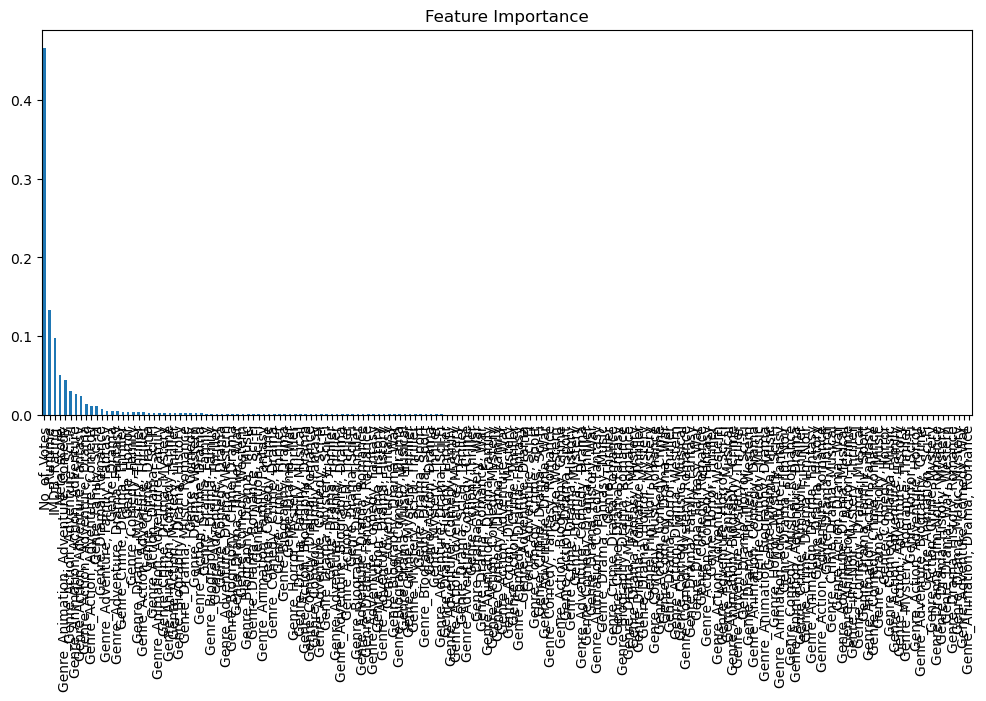

In [127]:
# 11. Feature importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title="Feature Importance")
plt.show()


In [128]:
# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} R²: {r2_score(y_true, y_pred):.4f}")
    print(f"{model_name} RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
# Evaluate both models
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression R²: 0.4529
Linear Regression RMSE: 93280502.96
Random Forest R²: 0.3617
Random Forest RMSE: 100755404.71


C:\Users\mungi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mungi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


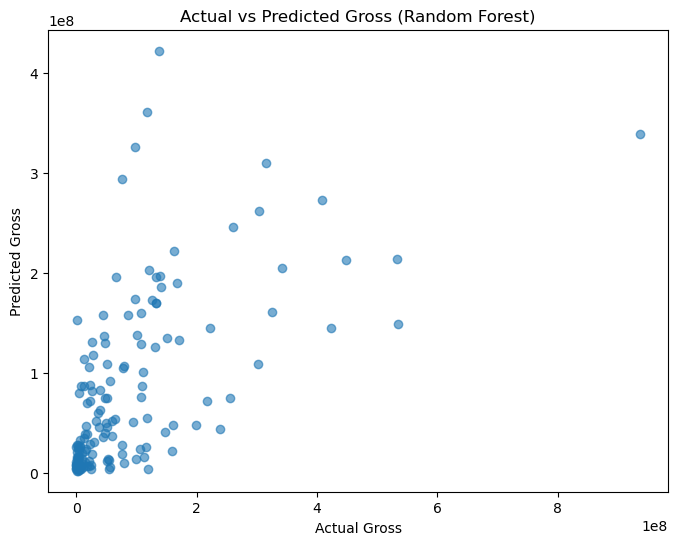

In [129]:
# Visualization: Actual vs Predicted (Random Forest)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross (Random Forest)")
plt.show()


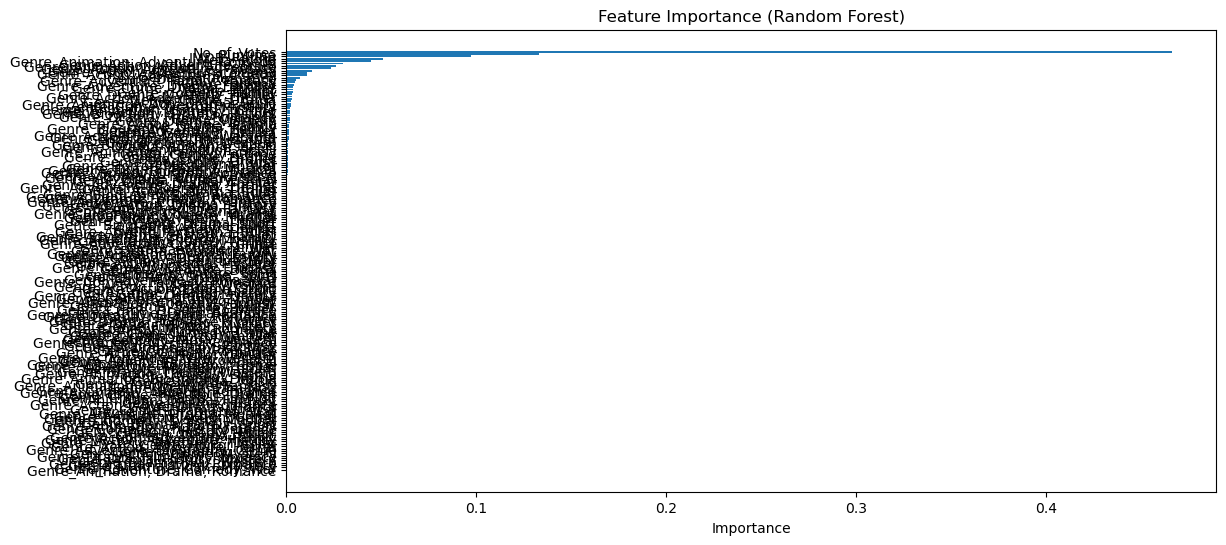

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from Random Forest
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # largest importance on top
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

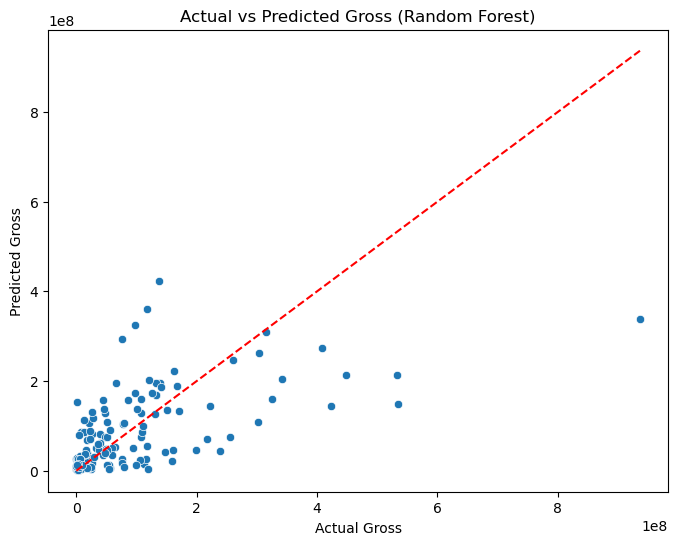

In [132]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross (Random Forest)")
plt.show()

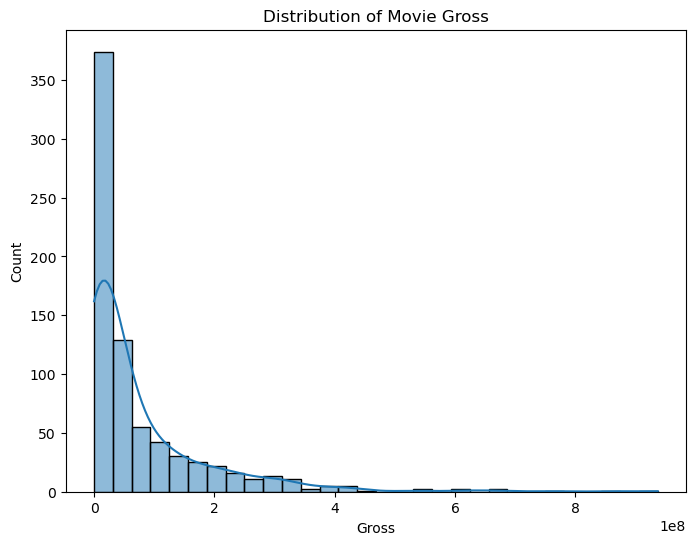

In [133]:
plt.figure(figsize=(8,6))
sns.histplot(df['Gross'], bins=30, kde=True)
plt.xlabel("Gross")
plt.title("Distribution of Movie Gross")
plt.show()

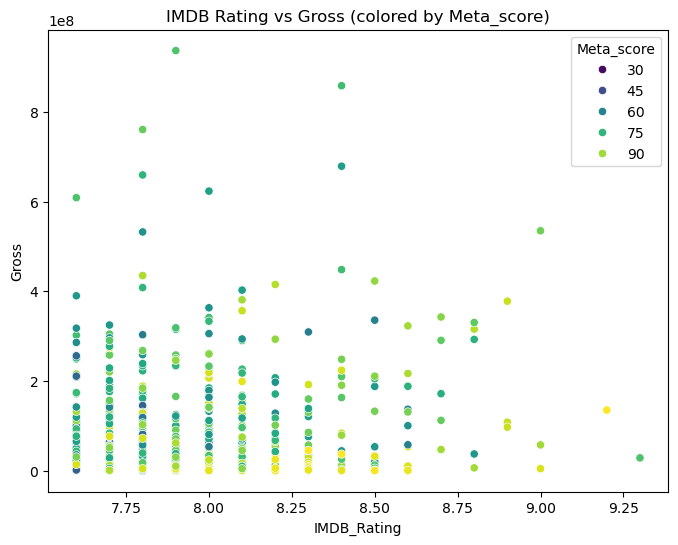

In [134]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, hue='Meta_score', palette='viridis')
plt.title("IMDB Rating vs Gross (colored by Meta_score)")
plt.show()


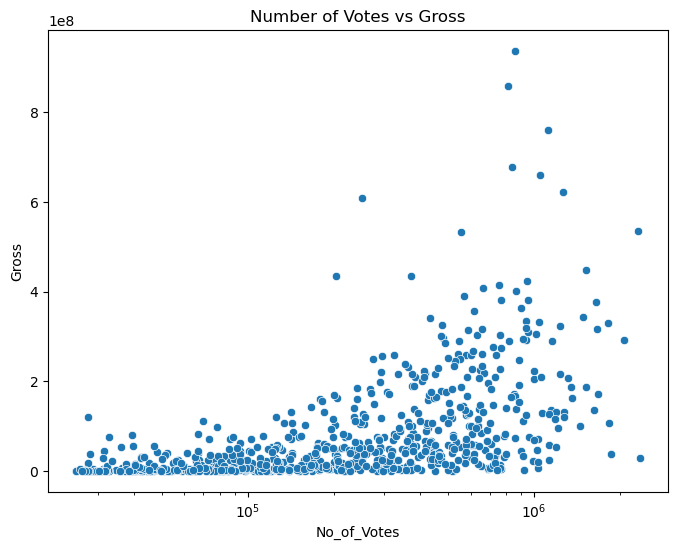

In [138]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='No_of_Votes', y='Gross', data=df)
plt.xscale('log')  # optional, votes can vary widely
plt.title("Number of Votes vs Gross")
plt.show()


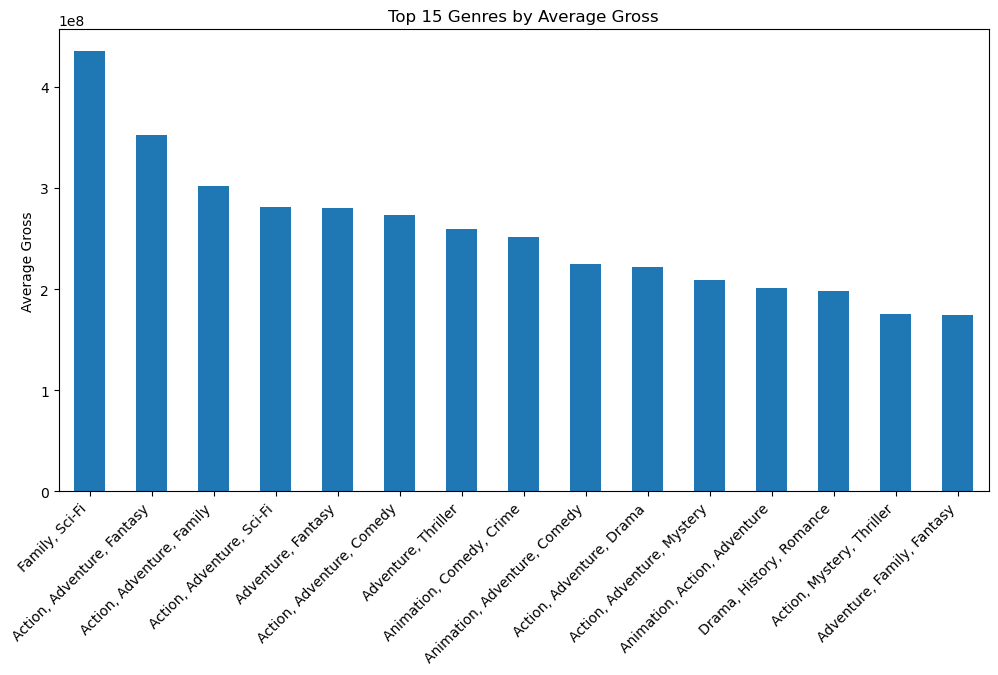

In [144]:
genre_cols = [col for col in df.columns if col.startswith('Genre_')]

# Average gross for each dummy genre (weighted by membership)
avg_gross_by_genre = {}
for col in genre_cols:
    avg_gross_by_genre[col.replace("Genre_", "")] = df.loc[df[col] == 1, 'Gross'].mean()

avg_gross_by_genre = pd.Series(avg_gross_by_genre).sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
avg_gross_by_genre.plot(kind='bar')
plt.ylabel("Average Gross")
plt.title("Top 15 Genres by Average Gross")
plt.xticks(rotation=45, ha='right')
plt.show()


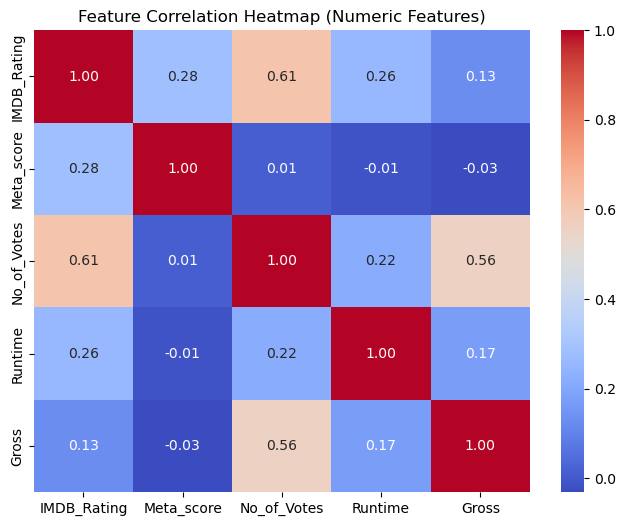

In [148]:
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Gross']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (Numeric Features)")
plt.show()


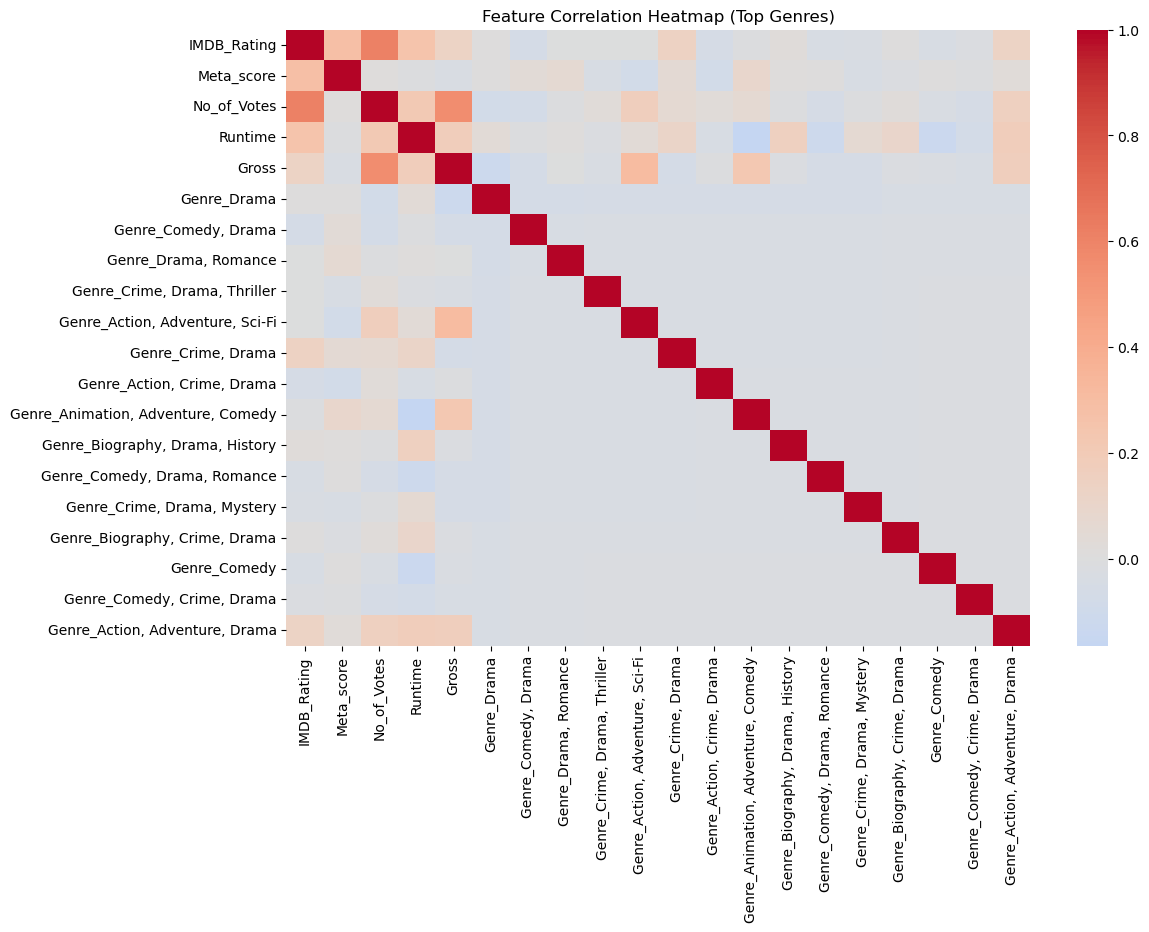

In [150]:
genre_cols = [col for col in df.columns if col.startswith('Genre_')]

# pick top 15 genres by frequency
top_genres = df[genre_cols].sum().sort_values(ascending=False).head(15).index
selected_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Gross'] + list(top_genres)

corr = df[selected_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap (Top Genres)")
plt.show()


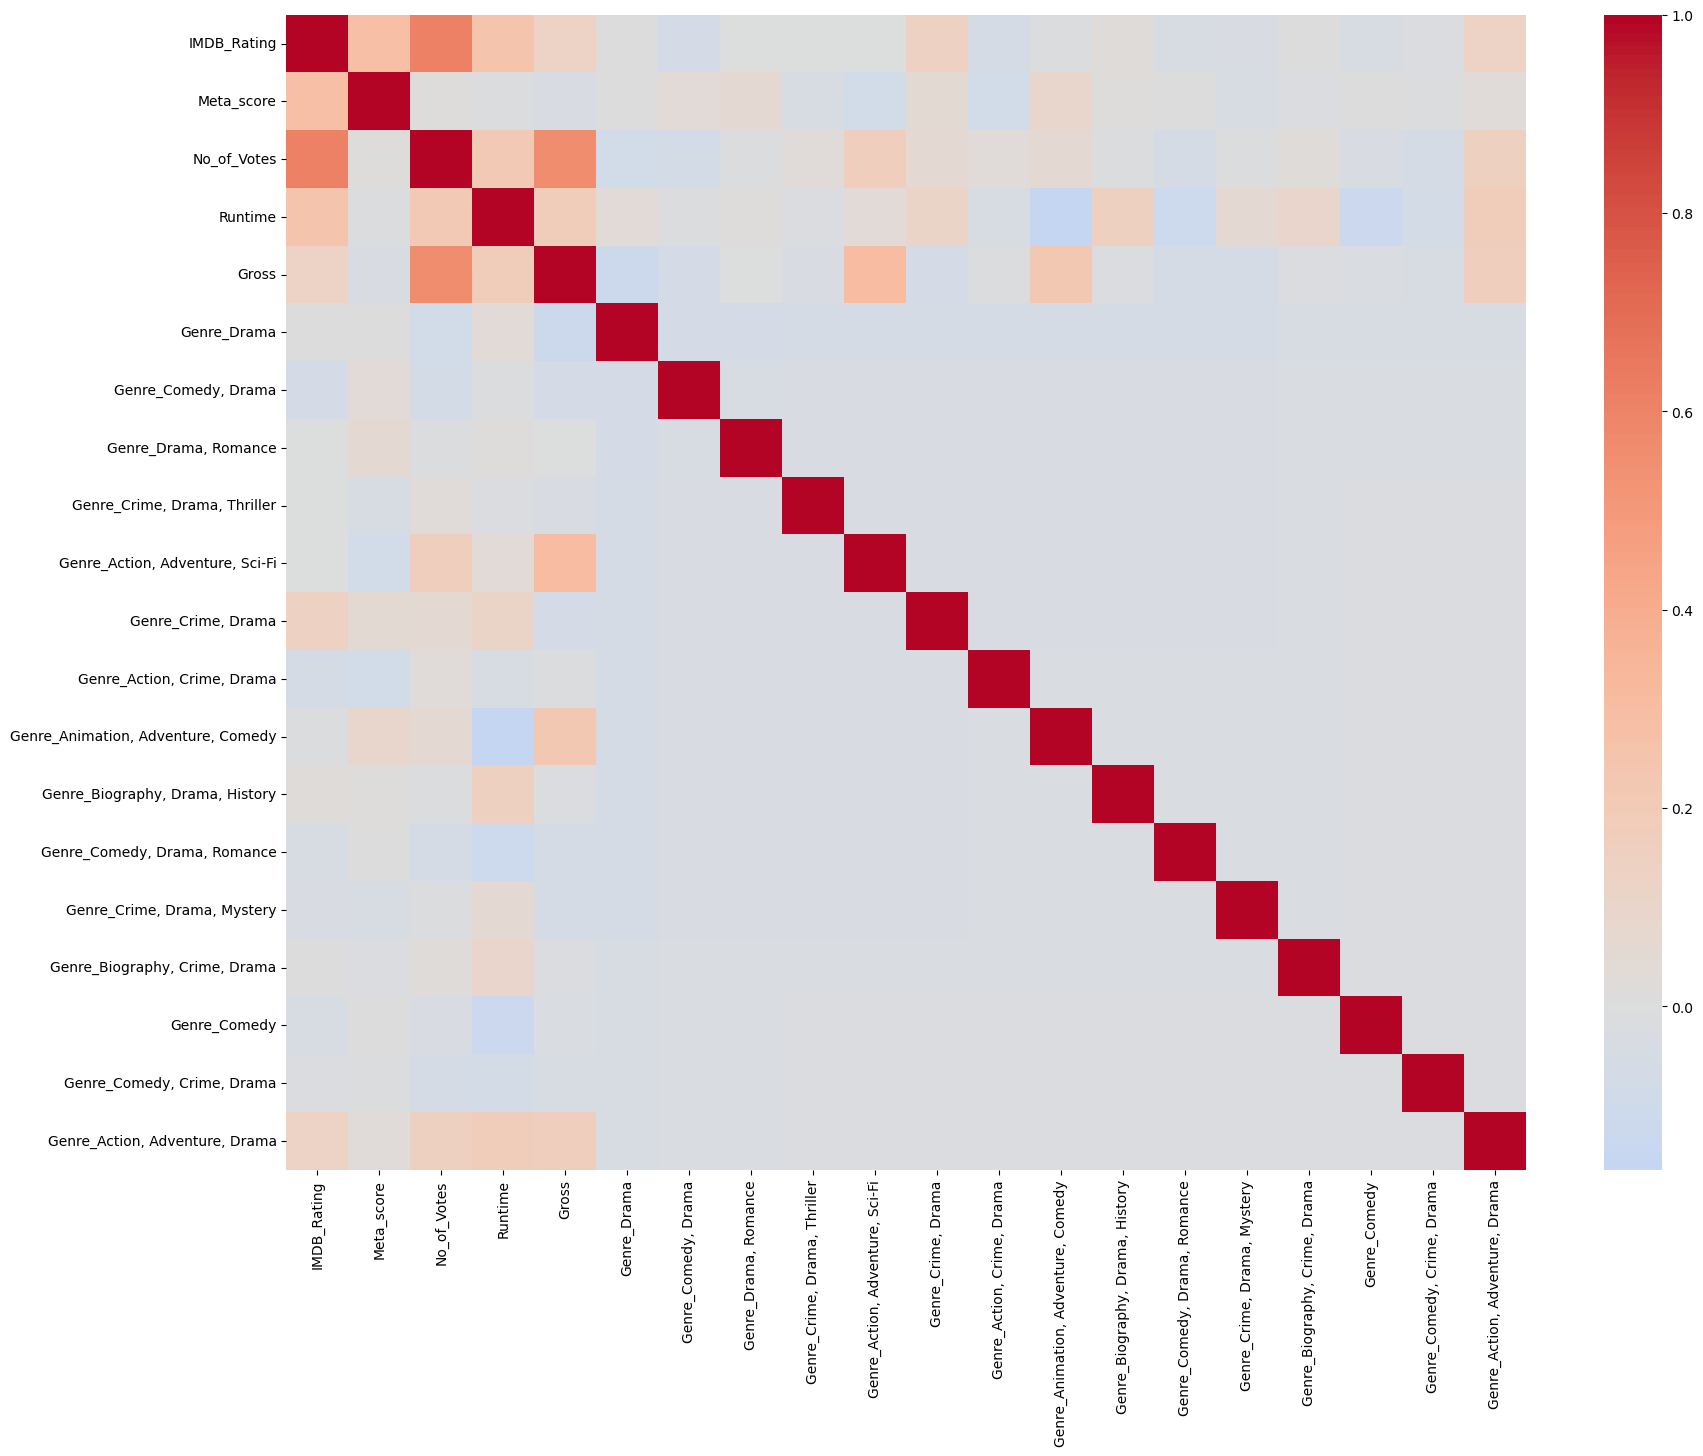

In [152]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [154]:
# Import Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mungi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mungi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
reviews = pd.read_csv(r"C:\Users\mungi\Downloads\IMDB Dataset.csv\IMDB Dataset.csv")
print(reviews.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [157]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split by spaces instead of NLTK tokenizer
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    # Join back into string
    return ' '.join(words)

reviews['cleaned_review'] = reviews['review'].apply(preprocess)

print(reviews[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mentioned watching 1 oz episode ...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [165]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

reviews['vader_sentiment'] = reviews['cleaned_review'].apply(vader_sentiment)

# Accuracy vs original sentiment
accuracy = (reviews['vader_sentiment'] == reviews['sentiment']).mean()
print(f"VADER Sentiment Accuracy: {accuracy:.2%}")

VADER Sentiment Accuracy: 67.29%


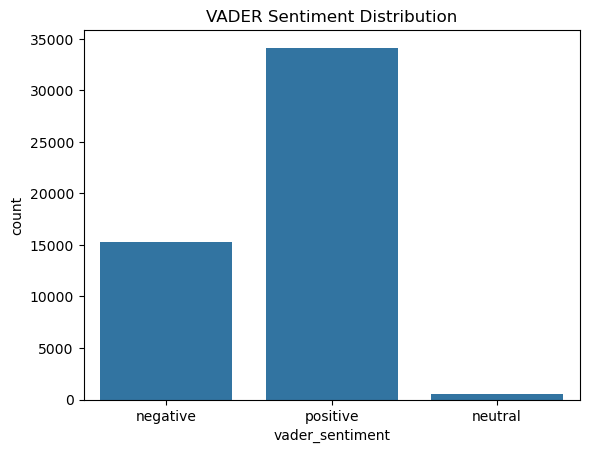

In [160]:
sns.countplot(x='vader_sentiment', data=reviews)
plt.title('VADER Sentiment Distribution')
plt.show()

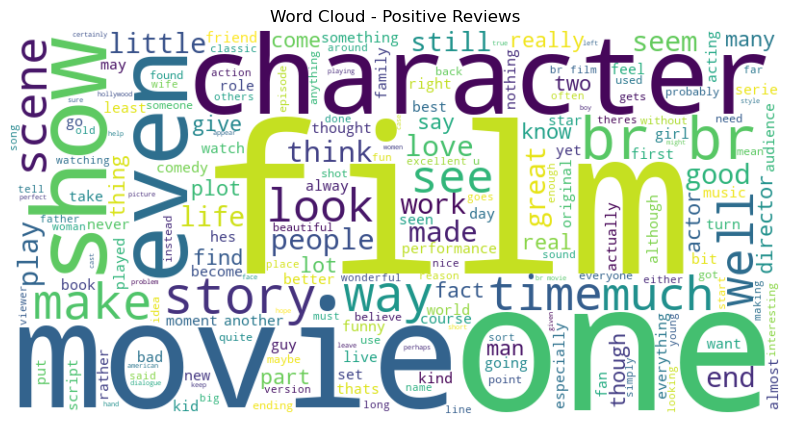

In [161]:
positive_text = ' '.join(reviews[reviews['vader_sentiment']=='positive']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

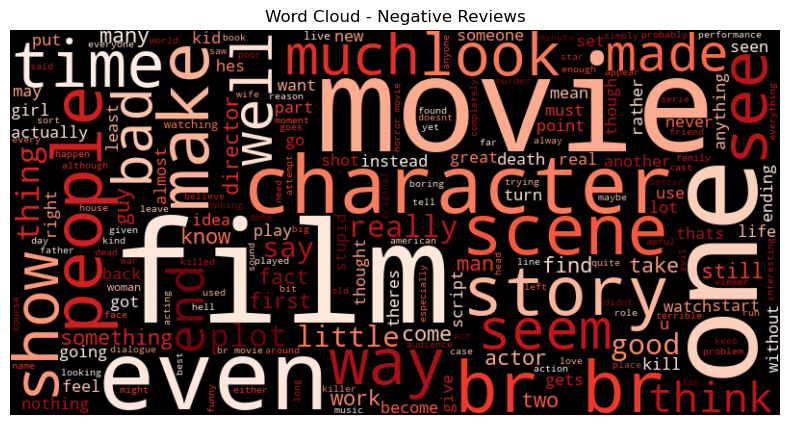

In [162]:
negative_text = ' '.join(reviews[reviews['vader_sentiment']=='negative']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()